In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df[['Age','EstimatedSalary','Purchased']]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
X.shape, y.shape

((400, 2), (400,))

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled.shape

(400, 2)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [11]:
X_train.shape

(320, 2)

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

# Stochastic Gradient Descent

In [15]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
# start = time.time()
history = model.fit(X_scaled, y, epochs=500, batch_size=1, validation_split=0.2) #Batch Gradient Descent
# print(time.time() - start)

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4654 - loss: 0.6999 - val_accuracy: 0.9375 - val_loss: 0.5464
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8747 - loss: 0.5450 - val_accuracy: 0.8750 - val_loss: 0.4699
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8411 - loss: 0.3813 - val_accuracy: 0.8875 - val_loss: 0.4037
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8460 - loss: 0.3295 - val_accuracy: 0.8875 - val_loss: 0.3745
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8655 - loss: 0.2956 - val_accuracy: 0.9125 - val_loss: 0.3272
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8555 - loss: 0.3032 - val_accuracy: 0.9250 - val_loss: 0.3169
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8946 - loss: 0.2590 - val_accuracy: 0.9375 - val_loss: 0.3143
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8793 - loss: 0.2864 - val_accu

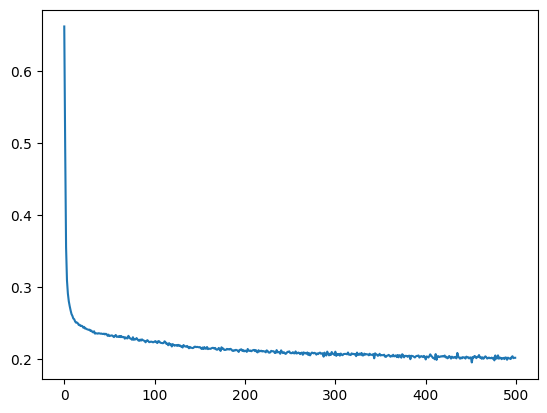

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

# Batch Gradient Descent

In [19]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
# start = time.time()
history = model.fit(X_scaled, y, epochs=500, batch_size=400, validation_split=0.2) #Batch Gradient Descent
# print(time.time() - start)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9219 - loss: 0.1933 - val_accuracy: 0.9125 - val_loss: 0.2724
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.9219 - loss: 0.1929 - val_accuracy: 0.9125 - val_loss: 0.2760
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.9219 - loss: 0.1926 - val_accuracy: 0.9125 - val_loss: 0.2788
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.9219 - loss: 0.1925 - val_accuracy: 0.9125 - val_loss: 0.2805
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9219 - loss: 0.1925 - val_accuracy: 0.9125 - val_loss: 0.2810
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9219 - loss: 0.1925 - val_accuracy: 0.9125 - val_loss: 0.2806
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9219 - loss: 0.1924 - val_accuracy: 0.9125 - val_loss: 0.2796
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9219 - loss: 0.1924 - val_accuracy: 0.9125 - val_l

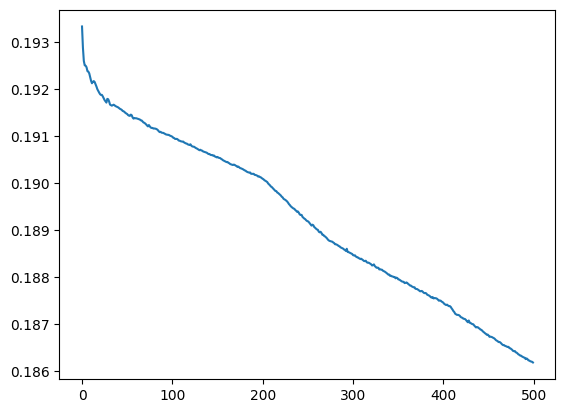

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])